In [42]:
from sympy import *
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

# Geometrical constants and prescribed velocity

In [43]:

relativeEccentrcity=0.5
R2_=7.6
R1_=5
shift=(R2_-R1_)*relativeEccentrcity
u_R_=0.4


# symbols

In [44]:

x,y,z,=symbols('x,y,z', real=True)
R1, R2, b=symbols('R1, R2, b', real=True)
R, a, x1,x2 =symbols('R, a, x1,x2', real=True)
u_R, xi, eta =symbols('u_R, xi, eta', real=True)

# Moebius Transform

In [45]:

w=(z+I*a)/(a*z+I)
w

(I*a + z)/(a*z + I)

In [46]:
# scaling, outer radius to 1

w=w.subs(z,x/R2+I*y/R2)
w

(I*a + x/R2 + I*y/R2)/(a*(x/R2 + I*y/R2) + I)

## Separation of real and imaginary part

In [47]:

xi_=simplify(re(w))
xi_

(a*x**2 + (R2 + a*y)*(R2*a + y))/(a**2*x**2 + (R2 + a*y)**2)

In [48]:
eta_=simplify(im(w))
eta_

x*(-R2 - a*y + a*(R2*a + y))/(a**2*x**2 + (R2 + a*y)**2)

# Constants from literature

In [49]:
# a and R from Churchill, Brown
a_=(1+x1*x2+sqrt((1-x1**2)*(1-x2**2)))/(x1+x2)
a_=a_.subs(x2,(b-R1))
a_=a_.subs(x1,(R1+b))
a_=a_.subs(R1,R1/R2)
a_=a_.subs(b,b/R2)

R_=(1-x1*x2+sqrt((1-x1**2)*(1-x2**2)))/(x1-x2)
R_=R_.subs(x2,(b-R1))
R_=R_.subs(x1,(R1+b))
R_=R_.subs(R1,R1/R2)
R_=R_.subs(b,b/R2)

# Velocity in concentric annulus in w-plane

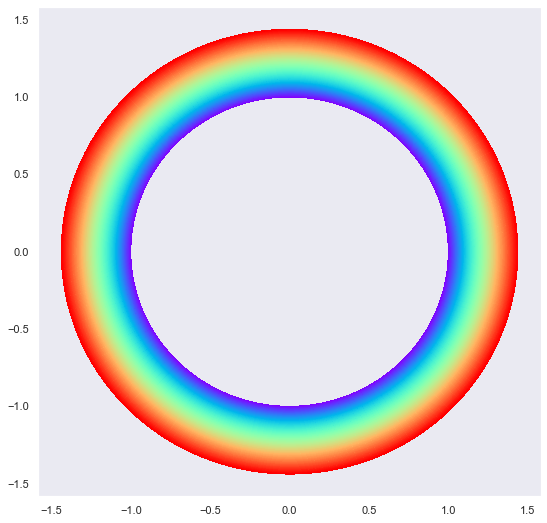

In [50]:
# Velocity in concentric annulus in w-plane
uw=u_R*log(sqrt(xi**2+eta**2))/log(R)
uwNum=uw.subs(R,R_)
uwNum=uwNum.subs(u_R,u_R_).subs(R1,R1_)
uwNum=uwNum.subs(R2,R2_).subs(b,shift)
uwNum=lambdify((xi,eta), uwNum)


# Plotting in w-Plane
RNum=R_.subs(R1,R1_).subs(R2,R2_)
RNum=float(RNum.subs(b,shift))
rho=np.linspace(1,RNum, 200)
theta=np.linspace(0,2*np.pi, 200)
Rho, Theta = np.meshgrid(rho, theta)
Xi= Rho * np.cos(Theta)
Eta= Rho * np.sin(Theta)
fig, ax = plt.subplots(figsize=(9,9))
ax.set_xlim(left=-RNum*1.1, right=RNum*1.1)
ax.set_ylim(bottom=-RNum*1.1, top=RNum*1.1)
plt.pcolor(Xi, Eta, uwNum(Xi, Eta), cmap='rainbow')




# Velocity in eccentric annulus in z-plane

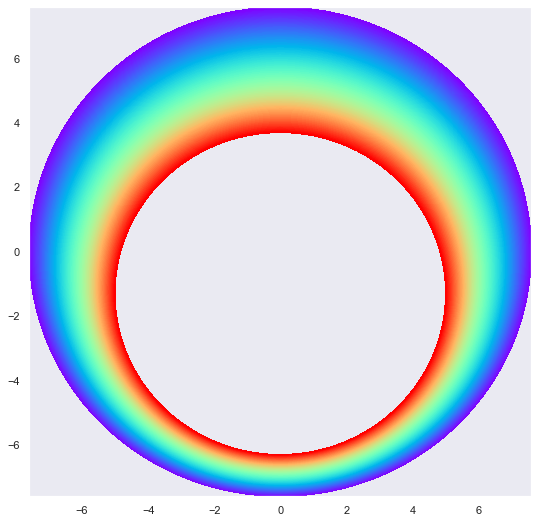

In [51]:
# Velocity in eccentric annulus in z-plane
uzNum=uw.subs(xi,xi_).subs(eta,eta_)
uzNum=uzNum.subs(a,a_)
uzNum=uzNum.subs(R,R_)
uzNum=uzNum.subs(u_R,u_R_).subs(R1,R1_)
uzNum=uzNum.subs(R2,R2_).subs(b,shift)
uzNum=lambdify((x,y), uzNum)


# Geometry creation and plotting
F=(R2_**2-R1_**2+shift**2)/(2*shift)
M=np.sqrt(F**2-R2_**2)
alpha=0.5*np.log((F+M)/(F-M))
beta=0.5*np.log((F-shift+M)/(F-shift-M)) 
yShift1=float((M*coth(alpha).evalf()))
X = np.linspace(-np.pi, np.pi,200)
Y = np.linspace(alpha,beta,200)
X, Y = np.meshgrid(X, Y)
zeta = X + 1j*Y
x_y = M*np.tan(zeta/2)
X = np.real(x_y)
Y = np.imag(x_y)-yShift1
fig, ax = plt.subplots(figsize=(9,9))
plt.pcolor(X,Y, uzNum(X,Y), cmap='rainbow')